* Let install some required tools

In [ ]:
!pip install yfinance

* Let import all needed dependencies

In [51]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [48]:
symbol = ['CRM', 'NFLX', 'SPOT'] #'AAPL', 'MSFT', 
data = yf.download(symbol, start='2020-01-01', end='2023-12-30')
data = data['Close']

[*********************100%%**********************]  3 of 3 completed


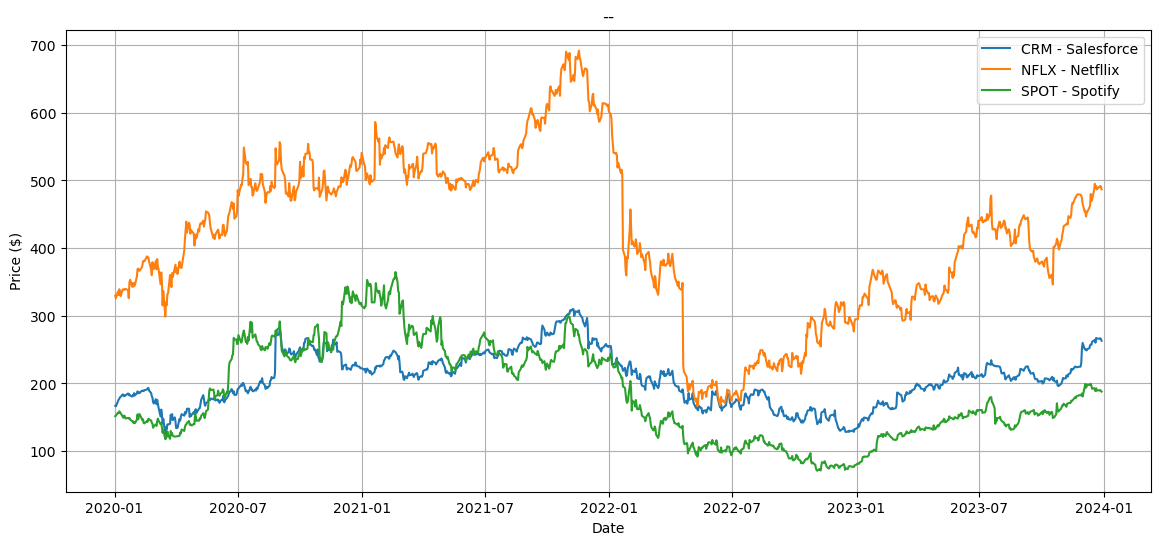

In [49]:
# Ploting
plt.figure(figsize=(14, 6))
plt.plot(data['CRM'], label='CRM - Salesforce')
plt.plot(data['NFLX'], label='NFLX - Netfllix')
plt.plot(data['SPOT'], label='SPOT - Spotify')
plt.title('--')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

"""correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of CRM, NFLX, and SPOT Closing Prices')
plt.show()"""

Correlation Matrix:
Ticker       CRM      NFLX      SPOT
Ticker                              
CRM     1.000000  0.824946  0.735940
NFLX    0.824946  1.000000  0.848462
SPOT    0.735940  0.848462  1.000000


'correlation_matrix = data.corr()\nplt.figure(figsize=(8, 6))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Correlation Matrix of CRM, NFLX, and SPOT Closing Prices\')\nplt.show()'

* Test

In [ ]:
def expected_return(weights, returns):
    return np.dot(weights, returns)

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights, np.dot(cov_matrix, weights))

# weight
weights  = np.array([0.5, 0.3, 0.2])
returns  = np.array([0.06, 0.04, 0.07])

portfolio_exp_return = expected_return(weights, returns)
portfolio_var        = portfolio_variance(weights, returns)

print("Expected return: {:.2%}".format(portfolio_exp_return))
print("Value of porfolio return: {:.4f}".format(portfolio_var))

* Create tensor for timeserie

In [67]:
import tensorflow as tf

# Test case for NETFLIX
closing_prices = data['NFLX']
n_steps = 10

# Utils
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Generate sequence
X, y = create_sequences(closing_prices, n_steps)

# Reshape X to be 3 tensor [sample, time_Step, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
X_tensor, y_tensor = tf.convert_to_tensor(X, dtype=tf.float32), tf.convert_to_tensor(y, dtype=tf.float32)

print("Input shape: ", X_tensor.shape)
print("Output shape: ", y_tensor.shape)

Input shape:  (996, 10, 1)
Output shape:  (996,)


/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_69880/1003393805.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i])
